In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
# from thunder.extraction.block.methods import grouplasso
from thunder.extraction.extraction import SourceExtraction
from scipy.io import loadmat
from scipy.misc import imsave
import matplotlib.pyplot as plt
import numpy as np
from BlockGroupLasso import gaussian_group_lasso, GetCenters, GetROI

In [3]:
datamat=loadmat('Datasets/data_exp2D.mat')['data']

In [4]:
# for i in range(datamat.shape[-1]):
#     imsave("Datasets/exp2D_%i.png"%i, datamat[:,:,i])

In [5]:
dataimg = tsc.loadImages('Datasets', inputFormat='png').cache()

In [6]:
pic_data = np.percentile(datamat, 90, axis=-1)
def plotModel(model):
    plt.figure(figsize=(20,8))
    plt.subplot(121)
    plt.scatter(*model.centers.T);
    plt.imshow(pic_data.T);
    plt.subplot(122)
    for i in range(len(model.coordinates)):
        plt.scatter(*(np.asarray(model.coordinates[i]).T), color=np.random.rand(3));
    plt.imshow(pic_data.T);

# just one block

In [7]:
data1 = dataimg.toBlocks()
data1.count()

1

## NMF from thunder

In [8]:
model1 = SourceExtraction('nmf').fit(data1)

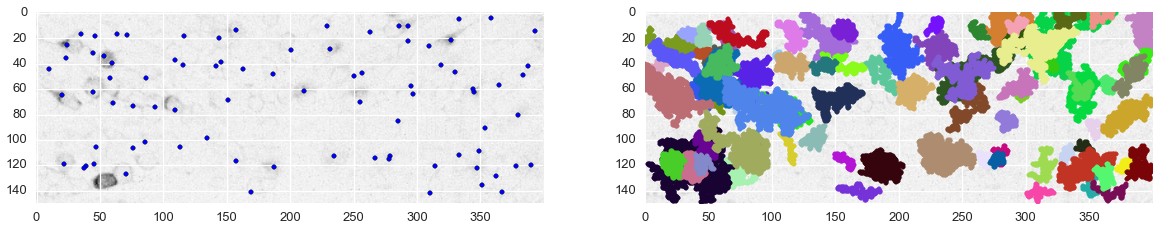

In [9]:
plotModel(model1)

## GroupLasso - no spark

In [10]:
N = 40 # estimated number of neurons per block
sig=(6,6)
TargetArea = N * np.prod(2. * np.array(sig)) / np.prod(datamat.shape[:2])
TargetRange = [TargetArea * 0.8, TargetArea * 1.2]
NonNegative = True
lam = 1

In [11]:
x = gaussian_group_lasso(
    np.transpose(datamat, [2, 0, 1]), sig, lam, NonNegative=NonNegative, TargetAreaRatio=TargetRange)
pic_x = np.percentile(x, 90, axis=0)
cent = GetCenters(pic_x)
ROI = GetROI(pic_x,  (np.array(cent)[:-1]).T)

Area Ratio = 0.01710,lambda=1.0000000
Area Ratio = 0.81258,lambda=0.1000000
Area Ratio = 0.03663,lambda=0.5500000
Area Ratio = 0.52160,lambda=0.3250000
Area Ratio = 0.16947,lambda=0.4375000
Area Ratio = 0.09033,lambda=0.4937500


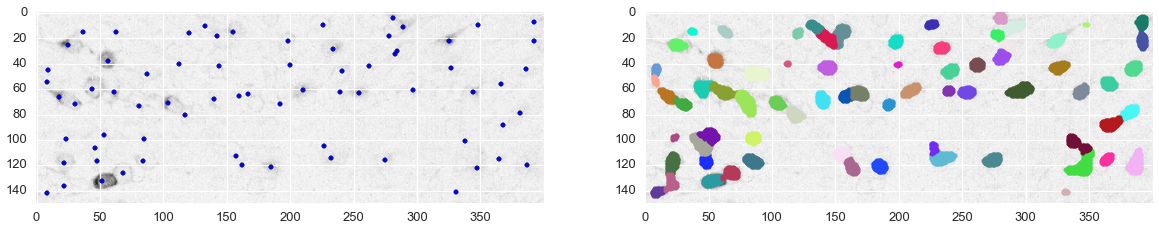

In [12]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(*(np.array(cent)[:-1]));
plt.imshow(pic_data.T);
plt.subplot(122)
for i in range(ROI.max()+1):
    plt.scatter(*np.where(ROI==i), color=np.random.rand(3));   
plt.imshow(pic_data.T);

In [13]:
# funnily exporting the data to png and loading the images yields slightly different results
x = gaussian_group_lasso(data1.first()[1],
    sig, lam, NonNegative=NonNegative, TargetAreaRatio=TargetRange)
pic_x = np.percentile(x, 90, axis=0)
cent = GetCenters(pic_x)
ROI = GetROI(pic_x,  (np.array(cent)[:-1]).T)

Area Ratio = 0.92828,lambda=1.0000000
Area Ratio = 0.00000,lambda=10.0000000
Area Ratio = 0.85935,lambda=5.5000000
Area Ratio = 0.07468,lambda=7.7500000
Area Ratio = 0.82090,lambda=6.6250000
Area Ratio = 0.69955,lambda=7.1875000
Area Ratio = 0.47367,lambda=7.4687500
Area Ratio = 0.25193,lambda=7.6093750
Area Ratio = 0.12785,lambda=7.6796875
Area Ratio = 0.07275,lambda=7.7148438
Area Ratio = 0.19627,lambda=7.6972656
Area Ratio = 0.13948,lambda=7.7060547
Area Ratio = 0.10862,lambda=7.7104492


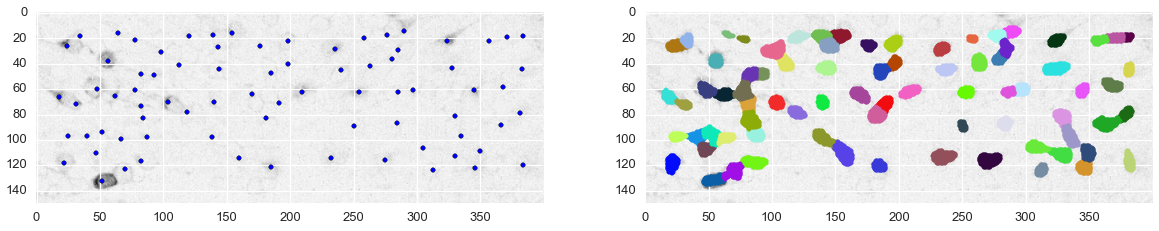

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.scatter(*(np.array(cent)[:-1]));
plt.imshow(pic_data.T);
plt.subplot(122)
for i in range(ROI.max()+1):
    plt.scatter(*np.where(ROI==i), color=np.random.rand(3));   
plt.imshow(pic_data.T);

## GroupLasso for thunder

In [18]:
model1GL = SourceExtraction('grouplasso', sig=sig, nonNegative=True,
    targetAreaRatio=TargetRange, lam=lam).fit(data1)

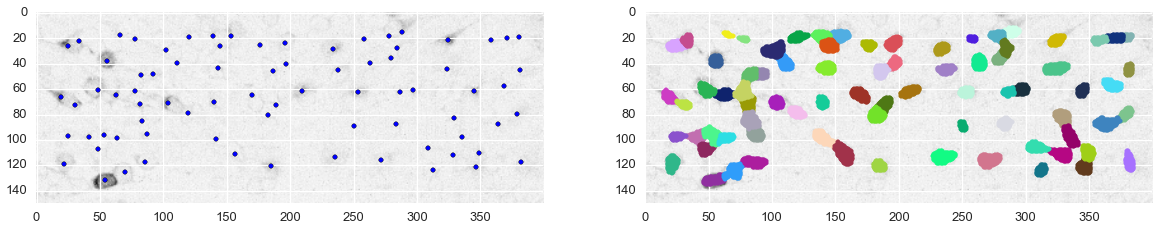

In [19]:
plotModel(model1GL)

# many blocks (here 8)

In [20]:
datapad = dataimg.toBlocks((100,80), padding=20)
datapad.count()

8

## NMF from thunder

In [21]:
modelpad = SourceExtraction('nmf').fit(datapad)

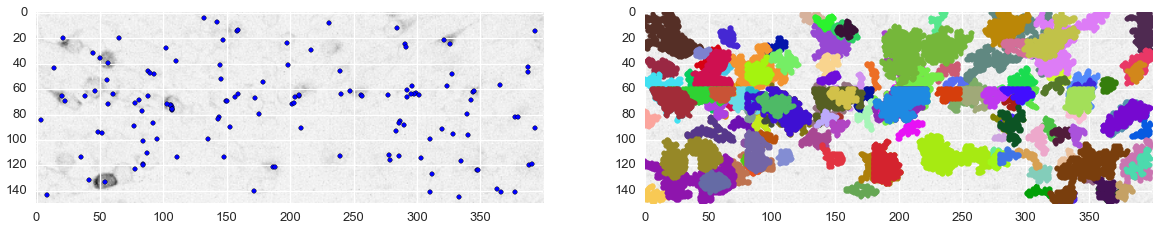

In [22]:
plotModel(modelpad)

In [27]:
from thunder.extraction.block.mergers import OverlapBlockMerger

In [31]:
merg = OverlapBlockMerger()
modelpad = SourceExtraction('nmf', merger=merg).fit(datapad)

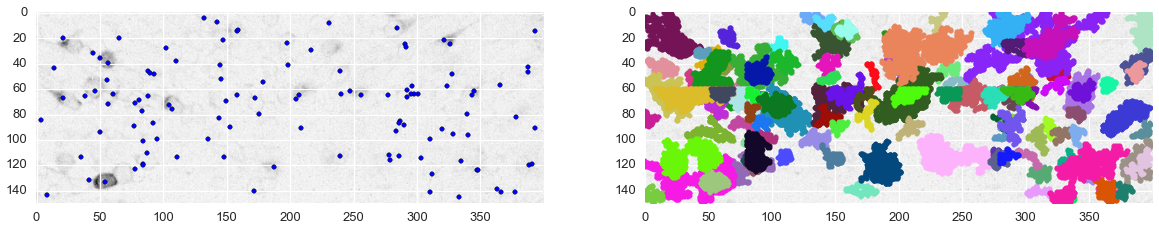

In [32]:
plotModel(modelpad)

## GroupLasso for thunder

In [23]:
modelpadGL = SourceExtraction('grouplasso', sig=sig, nonNegative=True, verbose=True,
    targetAreaRatio=TargetRange, lam=1).fit(datapad)

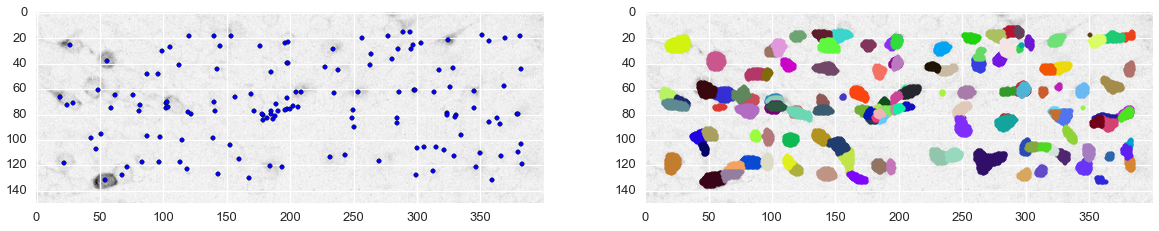

In [24]:
plotModel(modelpadGL)

In [33]:
modelpadGL = SourceExtraction('grouplasso', merger=merg, sig=sig, nonNegative=True, verbose=True,
    targetAreaRatio=TargetRange, lam=1).fit(datapad)

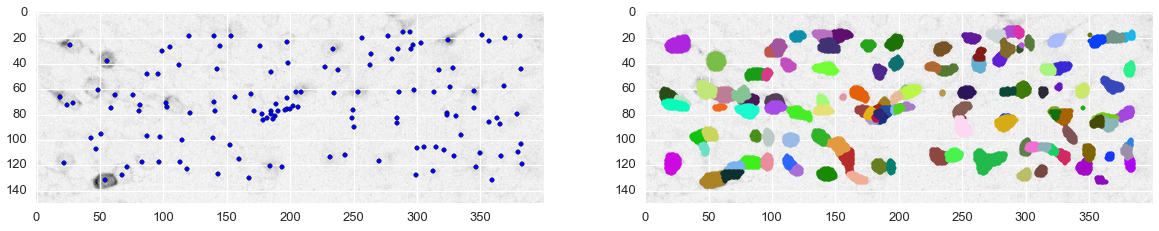

In [34]:
plotModel(modelpadGL)